In [3]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import cv2
from scipy.io import loadmat
import os
import re


**For MultiClass**

In [8]:
# Constants
IMAGE_SIZE = 512
BATCH_SIZE = 4
NUM_CLASSES = 32

# Helper functions for file matching and dataset preparation
def get_frame_number(path):
    basename = os.path.basename(path)
    if basename.endswith('.jpg'):
        frame_number = re.search(r'frame_(\d+)\.jpg', basename)
    elif basename.endswith('_multiclass.png'):
        frame_number = re.search(r'_(\d+)_multiclass\.png', basename)
    else:
        frame_number = None
    if frame_number:
        return frame_number.group(1)
    return None

def get_unique_frame_number(path):
    dirname = os.path.dirname(path)
    location = os.path.basename(os.path.dirname(dirname))
    frame_number = get_frame_number(path)
    if frame_number:
        return f"{location}_{frame_number}"
    return None

def match_files(images, masks):
    image_dict = {}
    mask_dict = {}

    for image_path in images:
        unique_frame_number = get_unique_frame_number(image_path)
        if unique_frame_number:
            image_dict[unique_frame_number] = image_path

    for mask_path in masks:
        unique_frame_number = get_unique_frame_number(mask_path)
        if unique_frame_number:
            if unique_frame_number in mask_dict:
                mask_dict[unique_frame_number].append(mask_path)
            else:
                mask_dict[unique_frame_number] = [mask_path]

    valid_images = []
    valid_masks = []

    for unique_frame_number in image_dict:
        if unique_frame_number in mask_dict:
            valid_images.append(image_dict[unique_frame_number])
            valid_masks.extend(mask_dict[unique_frame_number])

    return valid_images, valid_masks

def gather_file_paths(base_path):
    image_paths = []
    mask_paths = []
    for root, dirs, files in os.walk(base_path):
        for file in files:
            file_path = os.path.join(root, file)
            if file.endswith('.jpg'):
                image_paths.append(file_path)
            elif file.endswith('_multiclass.png'):
                mask_paths.append(file_path)
    return image_paths, mask_paths

def process_dataset(base_directory):
    image_paths, mask_paths = gather_file_paths(base_directory)
    valid_images, valid_masks = match_files(image_paths, mask_paths)
    print(f"Valid images: {len(valid_images)}, Valid masks: {len(valid_masks)}")
    return valid_images, valid_masks

# Base directories
train_directory = '/kaggle/input/aquavdatasetmain/Stratified_split/Stratified_split/Train'
val_directory = '/kaggle/input/aquavdatasetmain/Stratified_split/Stratified_split/Validation'
test_directory = '/kaggle/input/aquavdatasetmain/Stratified_split/Stratified_split/Test'

train_images, train_masks = process_dataset(train_directory)
val_images, val_masks = process_dataset(val_directory)
test_images, test_masks = process_dataset(test_directory)

# Image reading 
def read_image(image_path, mask=False):
    image = tf.io.read_file(image_path)
    if mask:
        image = tf.image.decode_png(image, channels=1)
        image.set_shape([None, None, 1])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    else:
        image = tf.image.decode_png(image, channels=3)
        image.set_shape([None, None, 3])
        image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    return image

def load_data(image_list, mask_list):
    image = read_image(image_list)
    mask = read_image(mask_list, mask=True)
    return image, mask

def data_generator(image_list, mask_list):
    dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
    dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    return dataset


train_dataset = data_generator(train_images, train_masks)
val_dataset = data_generator(val_images, val_masks)
test_dataset = data_generator(test_images, test_masks)

# Print 
print("Train Dataset:", train_dataset)
print("Val Dataset:", val_dataset)
print("Test Dataset:", test_dataset)


Valid images: 119, Valid masks: 119
Valid images: 37, Valid masks: 37
Valid images: 50, Valid masks: 50
Train Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
Val Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>
Test Dataset: <_BatchDataset element_spec=(TensorSpec(shape=(4, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(4, 512, 512, 1), dtype=tf.float32, name=None))>


**For Binary**

In [ ]:
# #binary
# import os
# import re
# import tensorflow as tf
# from tensorflow import keras
# import matplotlib.pyplot as plt

# # Constants
# IMAGE_SIZE = 512
# BATCH_SIZE = 4
# NUM_CLASSES = 1  # Binary segmentation

# # Helper functions for file matching and dataset preparation
# def get_frame_number(path):
#     basename = os.path.basename(path)
#     if basename.endswith('.jpg'):
#         frame_number = re.search(r'frame_(\d+)\.jpg', basename)
#     elif basename.endswith('_binary.png'):
#         frame_number = re.search(r'_(\d+)_binary\.png', basename)
#     else:
#         frame_number = None
#     if frame_number:
#         return frame_number.group(1)
#     return None

# def get_unique_frame_number(path):
#     dirname = os.path.dirname(path)
#     location = os.path.basename(os.path.dirname(dirname))
#     frame_number = get_frame_number(path)
#     if frame_number:
#         return f"{location}_{frame_number}"
#     return None

# def match_files(images, masks):
#     image_dict = {}
#     mask_dict = {}

#     for image_path in images:
#         unique_frame_number = get_unique_frame_number(image_path)
#         if unique_frame_number:
#             image_dict[unique_frame_number] = image_path

#     for mask_path in masks:
#         unique_frame_number = get_unique_frame_number(mask_path)
#         if unique_frame_number:
#             if unique_frame_number in mask_dict:
#                 mask_dict[unique_frame_number].append(mask_path)
#             else:
#                 mask_dict[unique_frame_number] = [mask_path]

#     valid_images = []
#     valid_masks = []

#     for unique_frame_number in image_dict:
#         if unique_frame_number in mask_dict:
#             valid_images.append(image_dict[unique_frame_number])
#             valid_masks.extend(mask_dict[unique_frame_number])

#     return valid_images, valid_masks

# def gather_file_paths(base_path):
#     image_paths = []
#     mask_paths = []
#     for root, dirs, files in os.walk(base_path):
#         for file in files:
#             file_path = os.path.join(root, file)
#             if file.endswith('.jpg'):
#                 image_paths.append(file_path)
#             elif file.endswith('_binary.png'):
#                 mask_paths.append(file_path)
#     return image_paths, mask_paths

# def process_dataset(base_directory):
#     image_paths, mask_paths = gather_file_paths(base_directory)
#     valid_images, valid_masks = match_files(image_paths, mask_paths)
#     print(f"Valid images: {len(valid_images)}, Valid masks: {len(valid_masks)}")
#     return valid_images, valid_masks

# # Base directories
# train_directory = '/kaggle/input/aquavdatasetmain/Stratified_split/Stratified_split/Train'
# val_directory = '/kaggle/input/aquavdatasetmain/Stratified_split/Stratified_split/Validation'
# test_directory = '/kaggle/input/aquavdatasetmain/Stratified_split/Stratified_split/Test'

# train_images, train_masks = process_dataset(train_directory)
# val_images, val_masks = process_dataset(val_directory)
# test_images, test_masks = process_dataset(test_directory)

# # Image reading and preprocessing
# def read_image(image_path, mask=False):
#     image = tf.io.read_file(image_path)
#     if mask:
#         image = tf.image.decode_png(image, channels=1)
#         image.set_shape([None, None, 1])
#         image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
#     else:
#         image = tf.image.decode_png(image, channels=3)
#         image.set_shape([None, None, 3])
#         image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
#     return image

# def load_data(image_list, mask_list):
#     image = read_image(image_list)
#     mask = read_image(mask_list, mask=True)
#     return image, mask

# def data_generator(image_list, mask_list):
#     dataset = tf.data.Dataset.from_tensor_slices((image_list, mask_list))
#     dataset = dataset.map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
#     dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
#     return dataset

# # Create datasets
# train_dataset = data_generator(train_images, train_masks)
# val_dataset = data_generator(val_images, val_masks)
# test_dataset = data_generator(test_images, test_masks)

# # Print datasets
# print("Train Dataset:", train_dataset)
# print("Val Dataset:", val_dataset)
# print("Test Dataset:", test_dataset)

# **Model**

In [9]:
import keras
from keras import layers
from keras import ops

import os
import numpy as np
from glob import glob
import cv2
from scipy.io import loadmat
import matplotlib.pyplot as plt

# For data preprocessing
from tensorflow import image as tf_image
from tensorflow import data as tf_data
from tensorflow import io as tf_io

def convolution_block(
    block_input,
    num_filters=256,
    kernel_size=3,
    dilation_rate=1,
    use_bias=False,
):
    x = layers.Conv2D(
        num_filters,
        kernel_size=kernel_size,
        dilation_rate=dilation_rate,
        padding="same",
        use_bias=use_bias,
        kernel_initializer=keras.initializers.HeNormal(),
    )(block_input)
    x = layers.BatchNormalization()(x)
    return ops.nn.relu(x)


def DilatedSpatialPyramidPooling(dspp_input):
    dims = dspp_input.shape
    x = layers.AveragePooling2D(pool_size=(dims[-3], dims[-2]))(dspp_input)
    x = convolution_block(x, kernel_size=1, use_bias=True)
    out_pool = layers.UpSampling2D(
        size=(dims[-3] // x.shape[1], dims[-2] // x.shape[2]),
        interpolation="bilinear",
    )(x)

    out_1 = convolution_block(dspp_input, kernel_size=1, dilation_rate=1)
    out_6 = convolution_block(dspp_input, kernel_size=3, dilation_rate=6)
    out_12 = convolution_block(dspp_input, kernel_size=3, dilation_rate=12)
    out_18 = convolution_block(dspp_input, kernel_size=3, dilation_rate=18)

    x = layers.Concatenate(axis=-1)([out_pool, out_1, out_6, out_12, out_18])
    output = convolution_block(x, kernel_size=1)
    return output

In [10]:
def DeeplabV3Plus(image_size, num_classes):
    model_input = keras.Input(shape=(image_size, image_size, 3))
    preprocessed = keras.applications.resnet50.preprocess_input(model_input)
    resnet50 = keras.applications.ResNet50(
        weights="imagenet", include_top=False, input_tensor=preprocessed
    )
    x = resnet50.get_layer("conv4_block6_2_relu").output
    x = DilatedSpatialPyramidPooling(x)

    input_a = layers.UpSampling2D(
        size=(image_size // 4 // x.shape[1], image_size // 4 // x.shape[2]),
        interpolation="bilinear",
    )(x)
    input_b = resnet50.get_layer("conv2_block3_2_relu").output
    input_b = convolution_block(input_b, num_filters=48, kernel_size=1)

    x = layers.Concatenate(axis=-1)([input_a, input_b])
    x = convolution_block(x)
    x = convolution_block(x)
    x = layers.UpSampling2D(
        size=(image_size // x.shape[1], image_size // x.shape[2]),
        interpolation="bilinear",
    )(x)
    model_output = layers.Conv2D(num_classes, kernel_size=(1, 1), padding="same")(x)
    return keras.Model(inputs=model_input, outputs=model_output)


model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)
# model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**For Binary**

In [ ]:
# from tensorflow.keras.losses import BinaryCrossentropy
# from tensorflow.keras.metrics import BinaryAccuracy

# # Define the loss function
# loss = BinaryCrossentropy(from_logits=False)

# Compile the model
# model.compile(
#     optimizer=keras.optimizers.Adam(learning_rate=0.001),
#     loss=loss,
#     metrics=[BinaryAccuracy()],
# )

# history = model.fit(train_dataset, validation_data=val_dataset, epochs=80)

# Plot training history
# plt.plot(history.history["loss"])
# plt.title("Training Loss")
# plt.ylabel("loss")
# plt.xlabel("epoch")
# plt.show()

# plt.plot(history.history["binary_accuracy"])  # Corrected key
# plt.title("Training Accuracy")
# plt.ylabel("accuracy")
# plt.xlabel("epoch")
# plt.show()

# plt.plot(history.history["val_loss"])
# plt.title("Validation Loss")
# plt.ylabel("val_loss")
# plt.xlabel("epoch")
# plt.show()

# plt.plot(history.history["val_binary_accuracy"])  # Corrected key
# plt.title("Validation Accuracy")
# plt.ylabel("val_accuracy")
# plt.xlabel("epoch")
# plt.show()

Epoch 1/40


I0000 00:00:1726511756.322553      64 service.cc:145] XLA service 0x7ccb18002920 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1726511756.322637      64 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-09-16 18:36:16.214445: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[256,304,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[4,304,128,128]{3,2,1,0}, f32[4,256,128,128]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-09-16 18:36:16.968312: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.754032538s
Trying algorithm eng0{} for co

29/29 ━━━━━━━━━━━━━━━━━━━━ 78s 453ms/step - accuracy: 0.6465 - loss: 1.8431 - val_accuracy: 0.0720 - val_loss: 1772893.5000
Epoch 2/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8137 - loss: 0.7664 - val_accuracy: 0.5120 - val_loss: 5911.1758
Epoch 3/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.8219 - loss: 0.6936 - val_accuracy: 0.1033 - val_loss: 139.9090
Epoch 4/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.8353 - loss: 0.6153 - val_accuracy: 0.2709 - val_loss: 45.0547
Epoch 5/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - accuracy: 0.8350 - loss: 0.5636 - val_accuracy: 0.7071 - val_loss: 2.7373
Epoch 6/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 309ms/step - accuracy: 0.8481 - loss: 0.5262 - val_accuracy: 0.6135 - val_loss: 5.2142
Epoch 7/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 308ms/step - accuracy: 0.8496 - loss: 0.4816 - val_accuracy: 0.6881 - val_loss: 1.2313
Epoch 8/40
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - accuracy: 0.8537 - loss: 0.4586 - val_accuracy: 

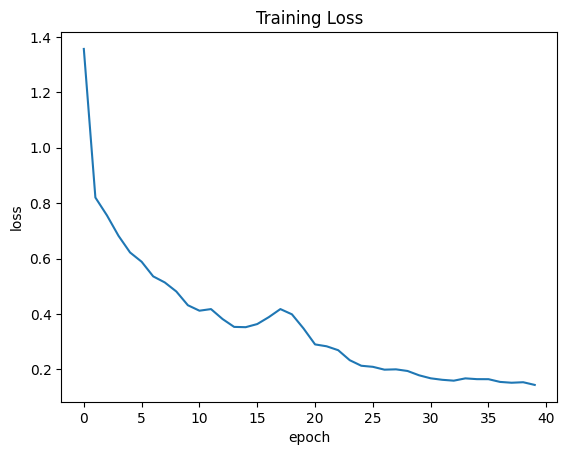

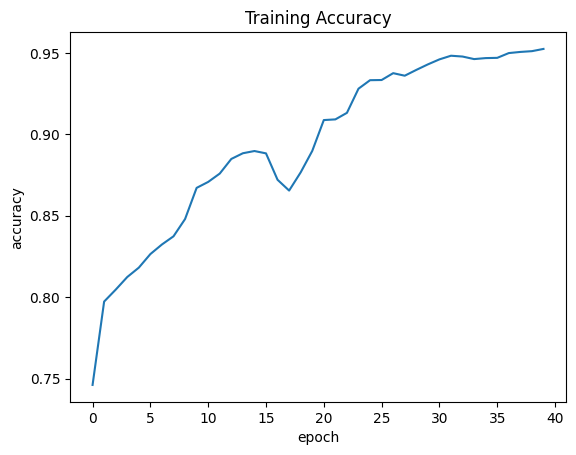

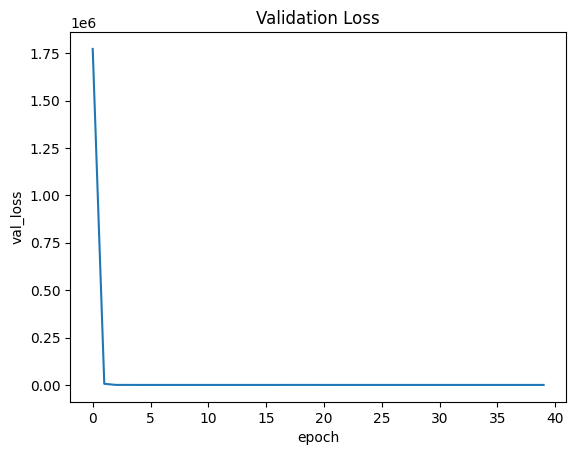

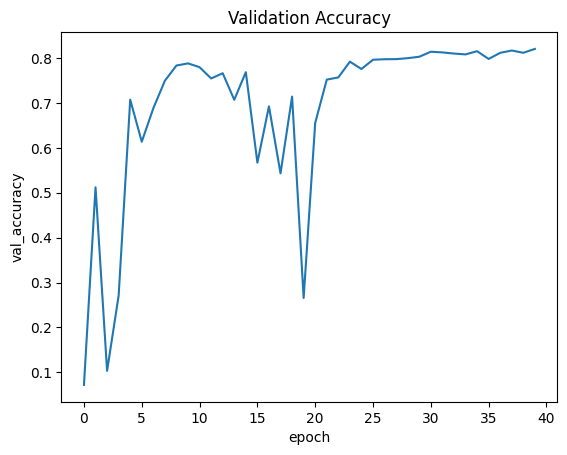

In [11]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) #formulticlass
# Model compilation and training
model = DeeplabV3Plus(image_size=IMAGE_SIZE, num_classes=NUM_CLASSES)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=loss,
    metrics=["accuracy"],
)

history = model.fit(train_dataset, validation_data=val_dataset, epochs=40)

# Plot training history
plt.plot(history.history["loss"])
plt.title("Training Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["accuracy"])
plt.title("Training Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_loss"])
plt.title("Validation Loss")
plt.ylabel("val_loss")
plt.xlabel("epoch")
plt.show()

plt.plot(history.history["val_accuracy"])
plt.title("Validation Accuracy")
plt.ylabel("val_accuracy")
plt.xlabel("epoch")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Images shape: (4, 512, 512, 3), Masks shape: (4, 512, 512, 1), Predictions shape: (4, 512, 512, 32)
Sample ground truth mask: 0, Sample prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Images shape: (4, 512, 512, 3), Masks shape: (4, 512, 512, 1), Predictions shape: (4, 512, 512, 32)
Sample ground truth mask: 0, Sample prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Images shape: (4, 512, 512, 3), Masks shape: (4, 512, 512, 1), Predictions shape: (4, 512, 512, 32)
Sample ground truth mask: 0, Sample prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Images shape: (4, 512, 512, 3), Masks shape: (4, 512, 512, 1), Predictions shape: (4, 512, 512, 32)
Sample ground truth mask: 5, Sample prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Images shape: (4, 512, 512, 3), Masks shape: (4, 512, 512, 1), Predictions shape: (4, 512, 512, 32)
Sample ground truth mask: 0, Sample prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Images shape: (4, 512,

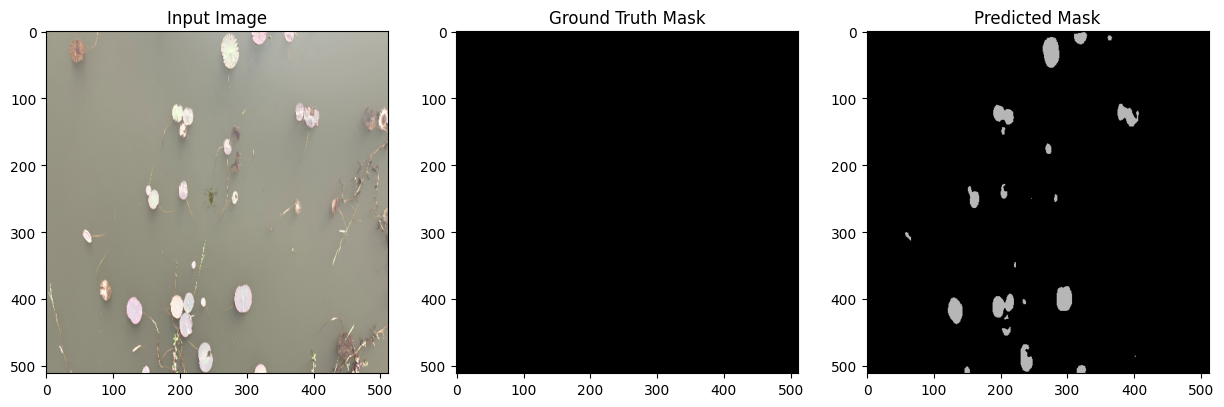

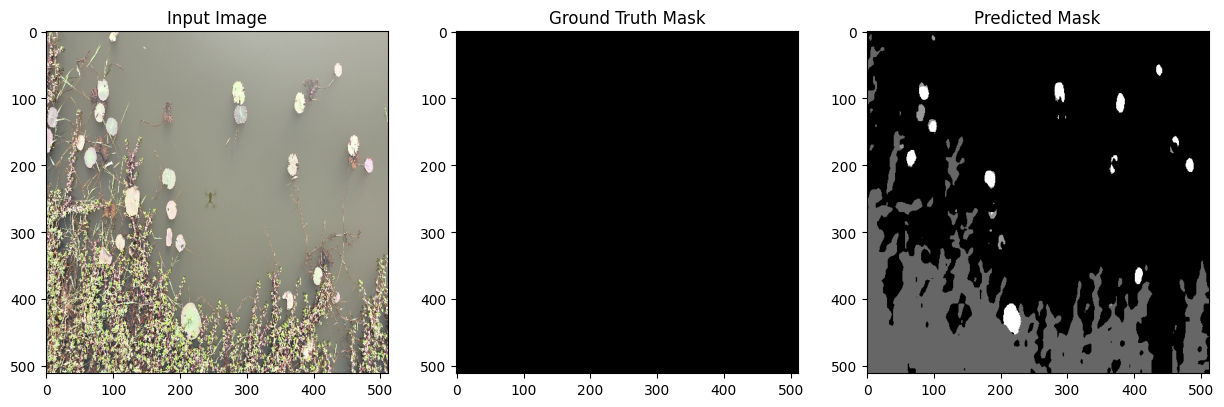

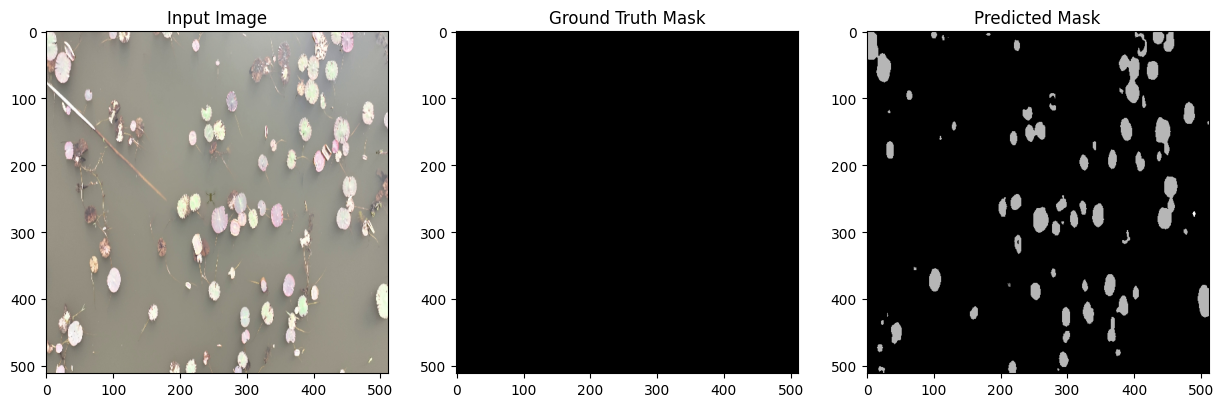

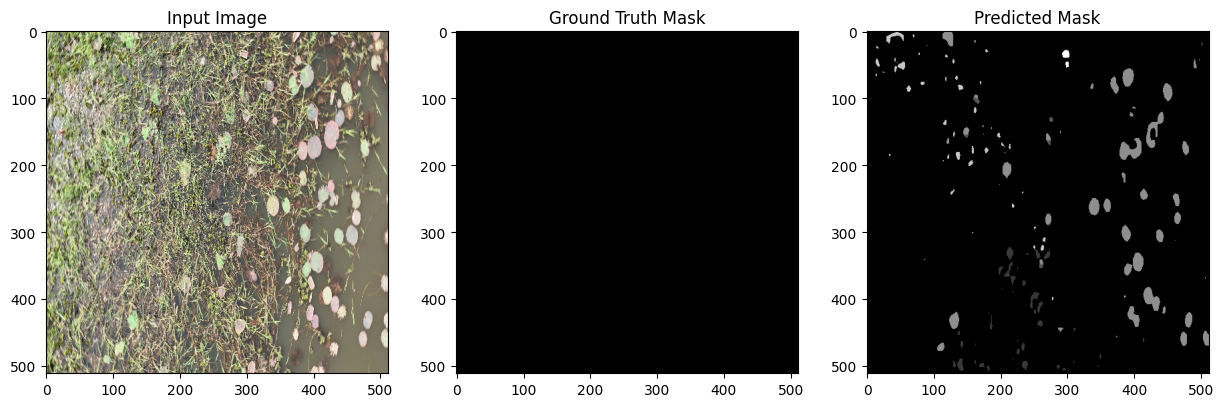

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


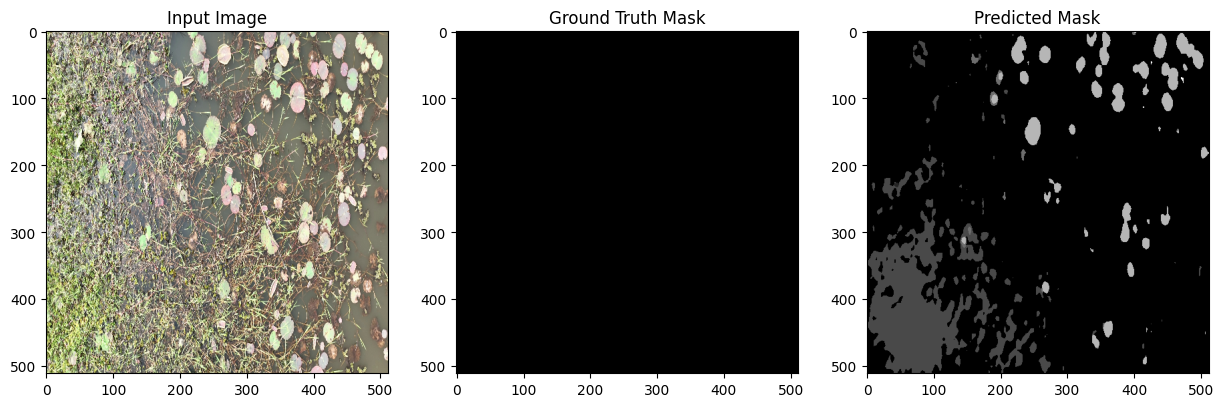

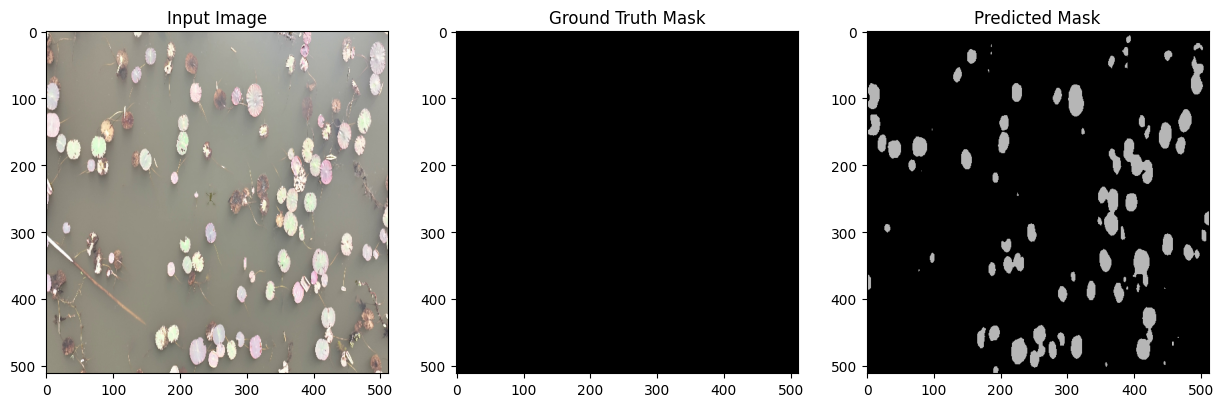

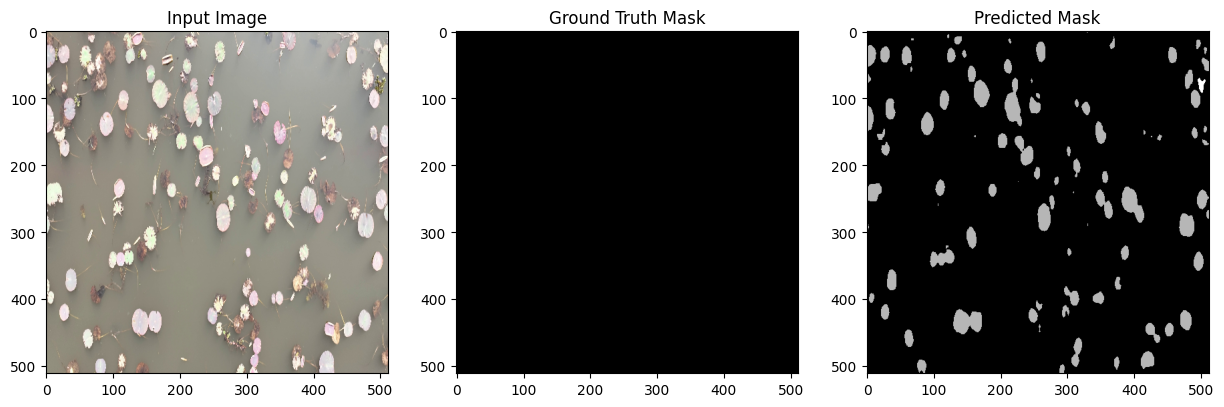

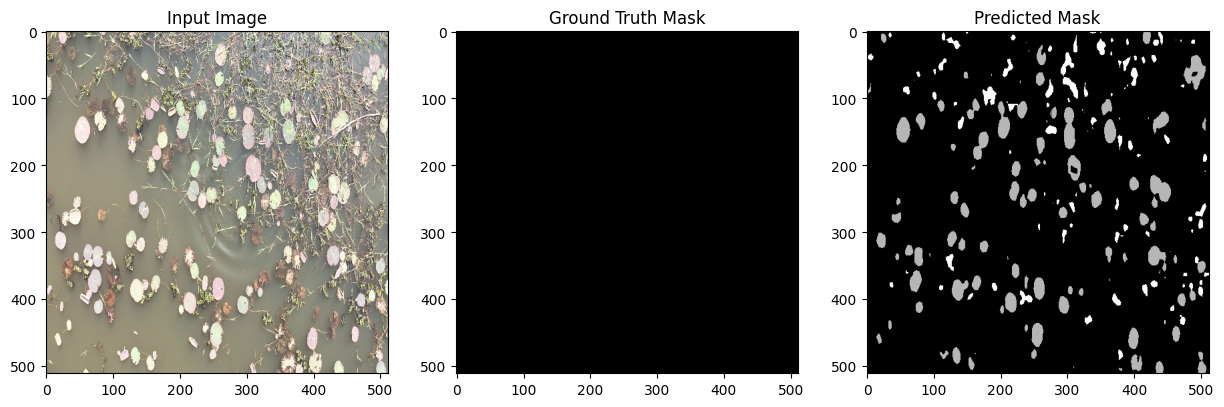

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


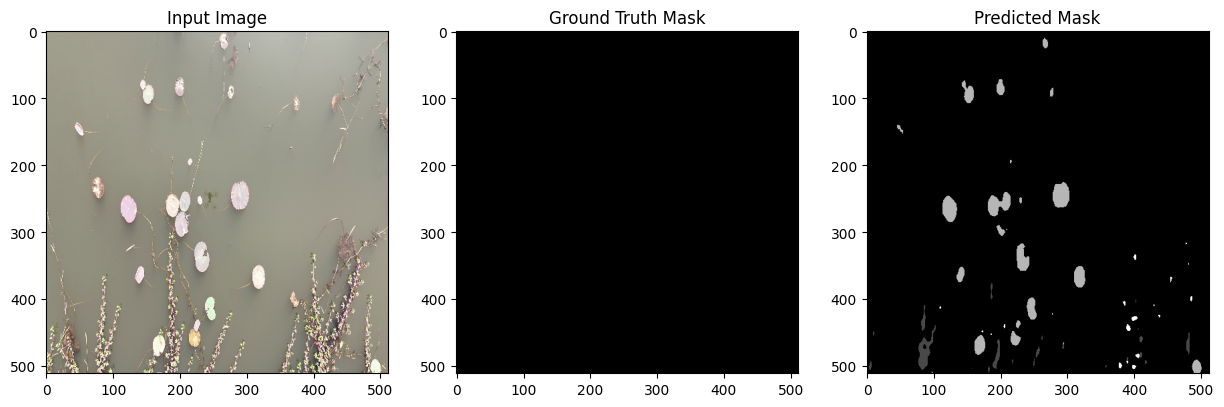

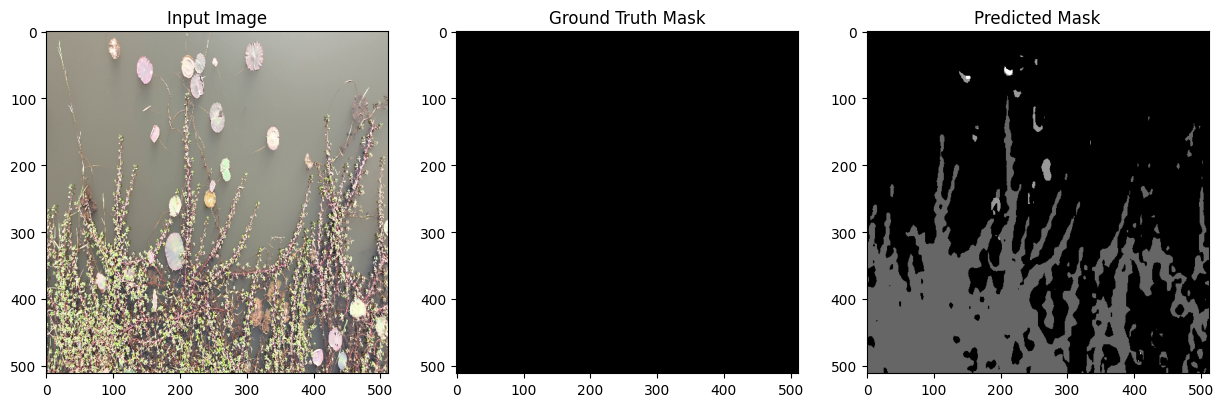

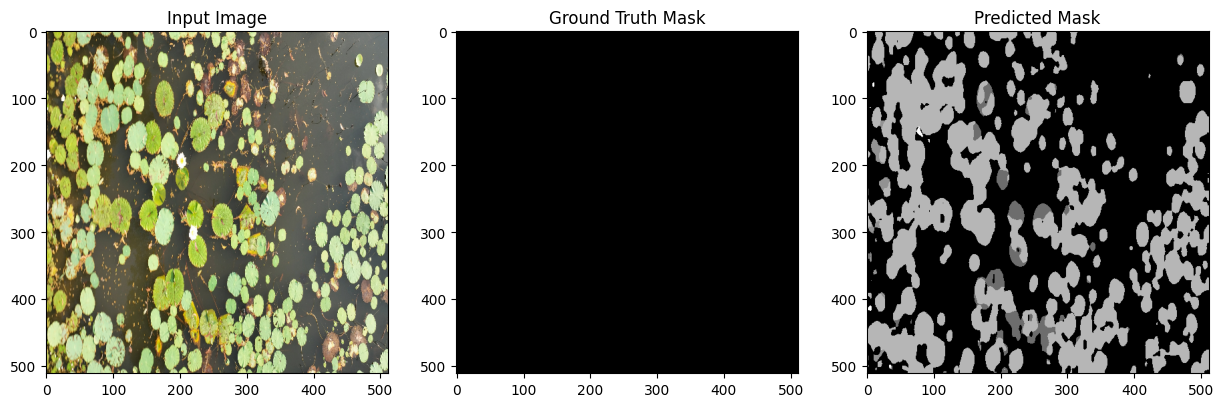

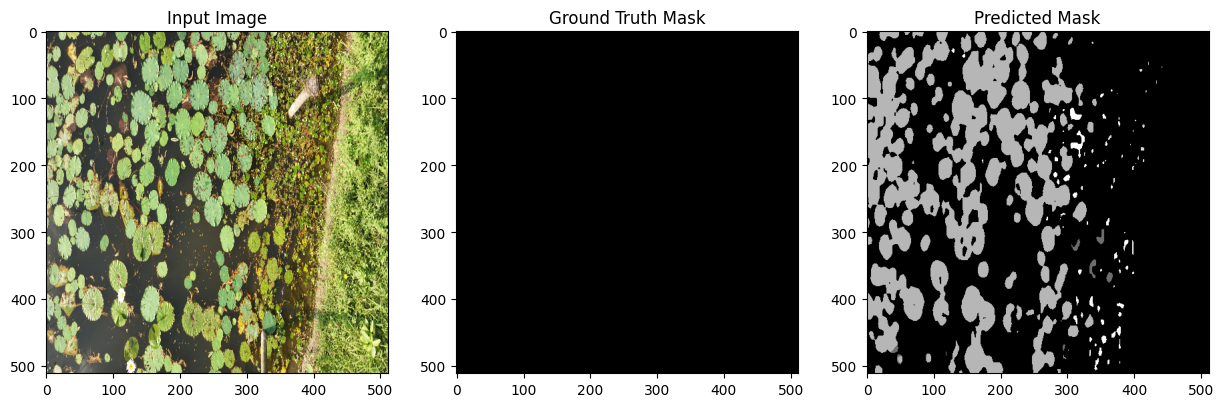

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


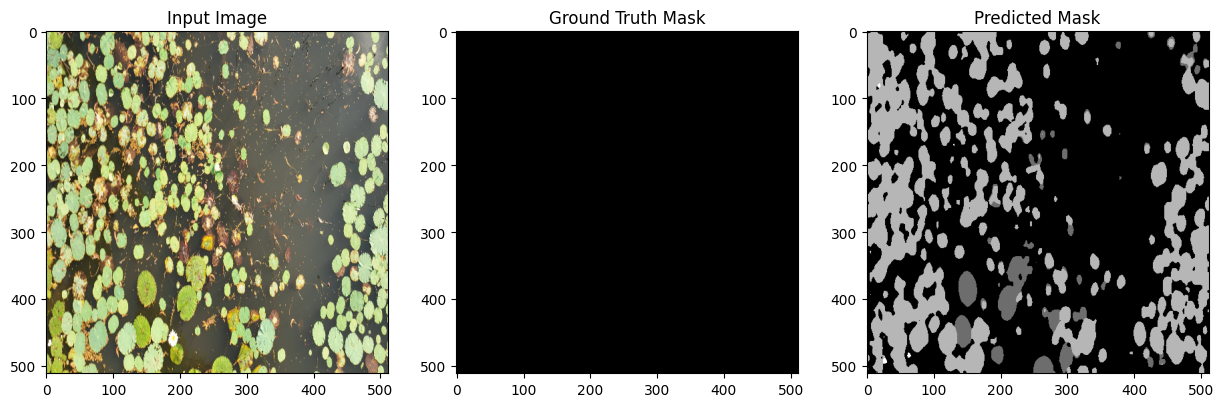

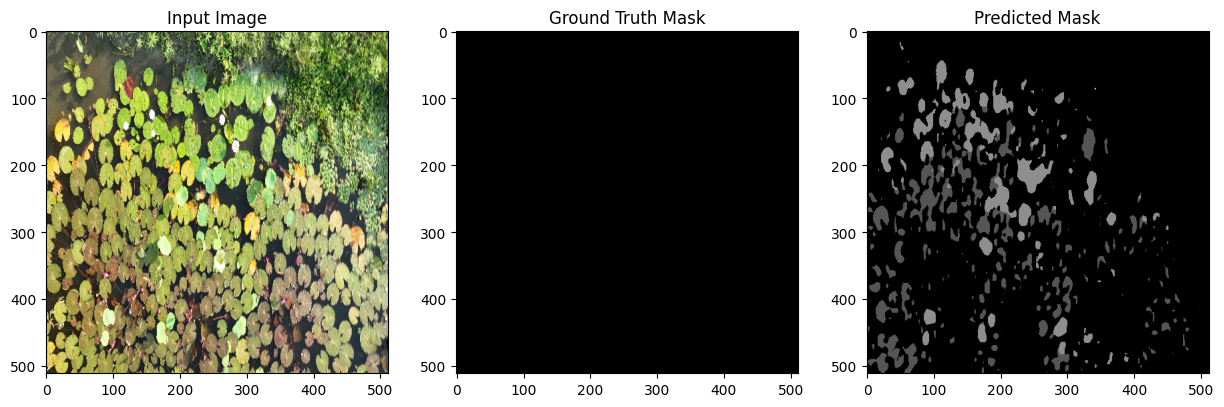

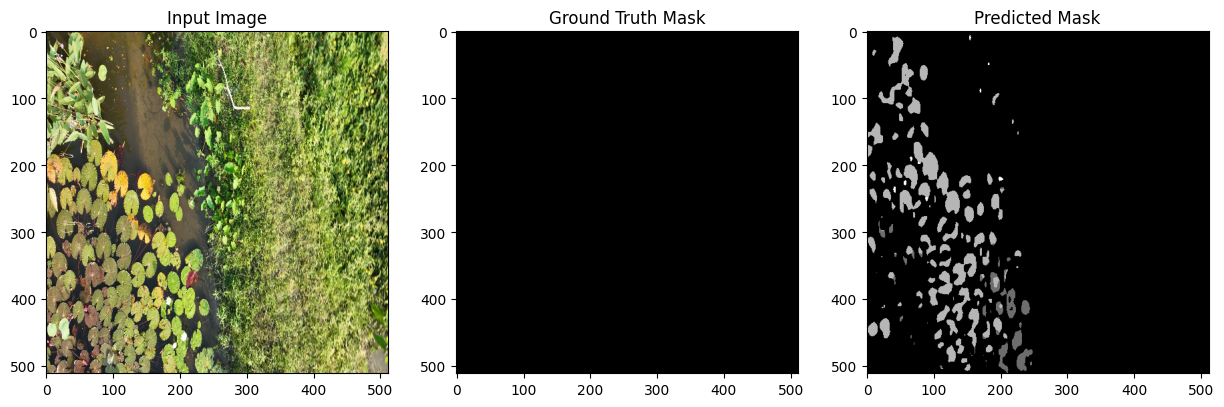

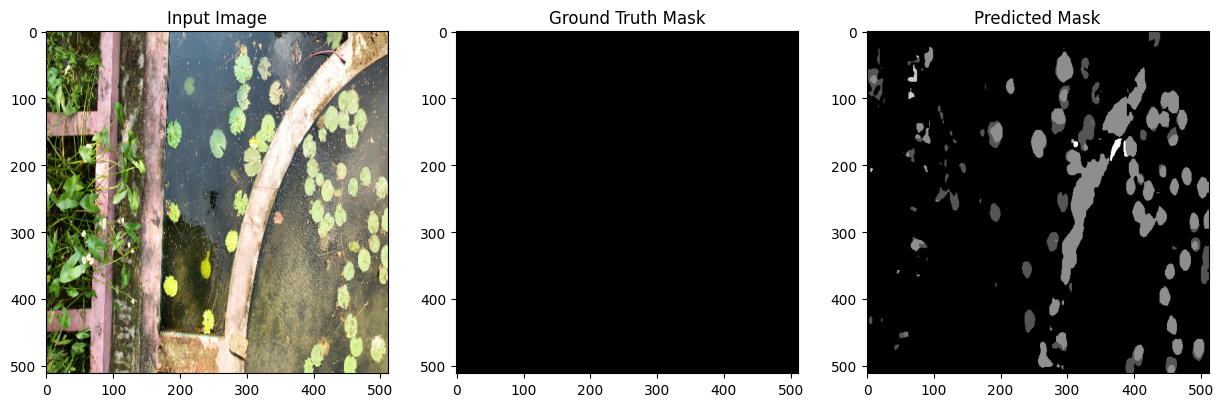

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


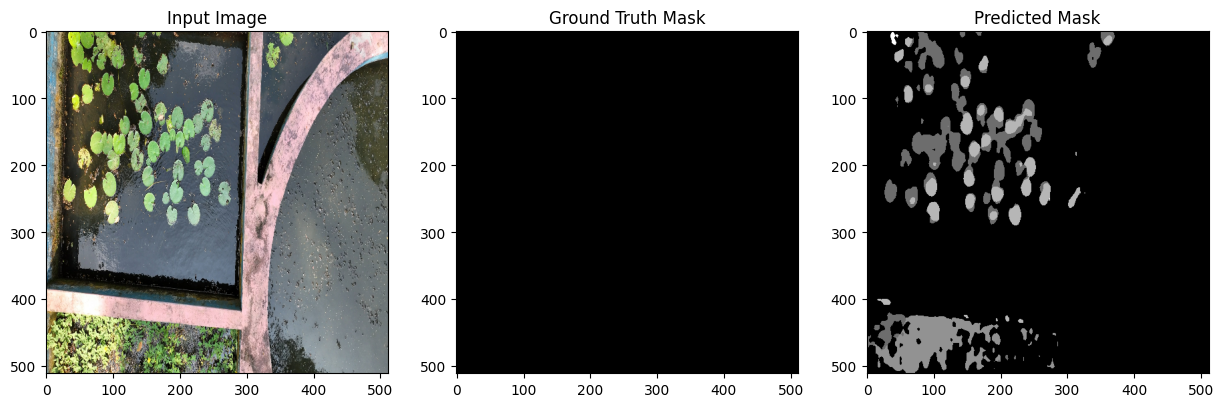

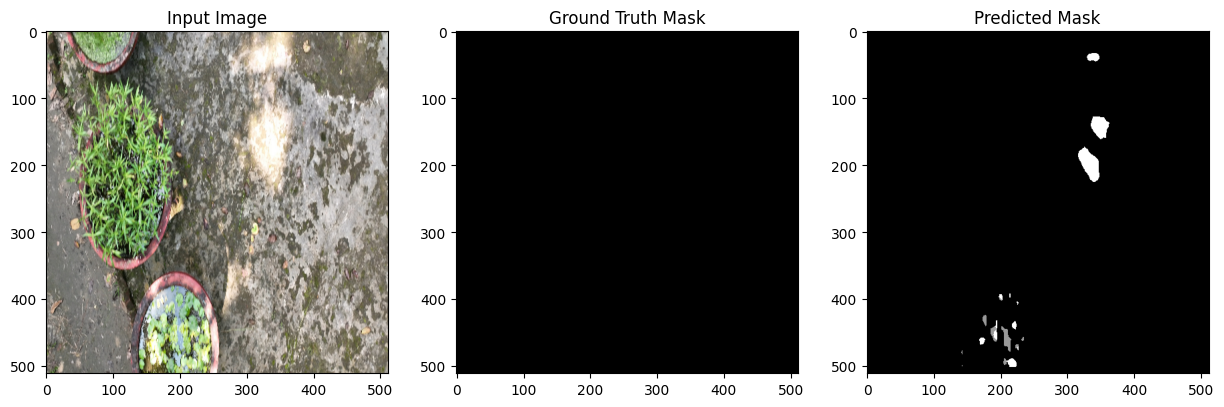

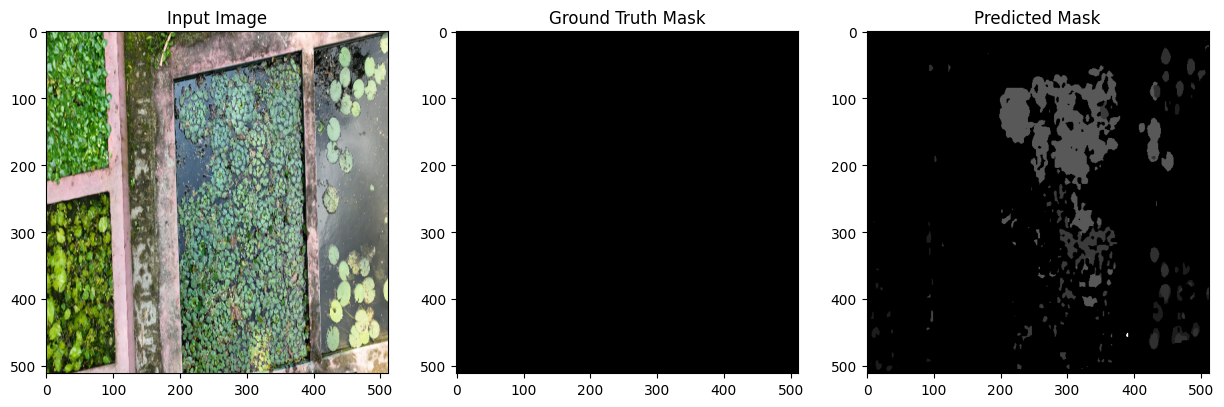

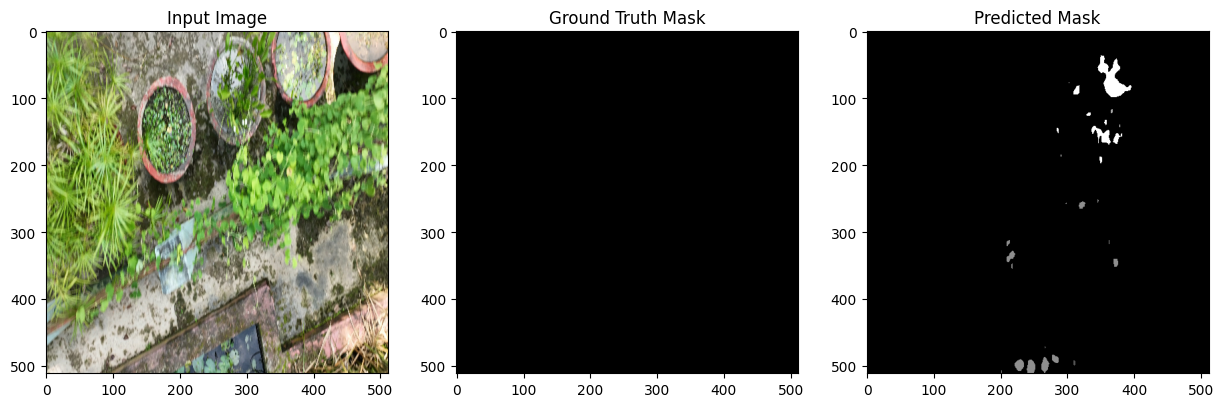

In [15]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Define constants
IMAGE_SIZE = 512
BATCH_SIZE = 4
NUM_CLASSES = 32

# Define metric calculation functions
def calculate_iou(y_true, y_pred, num_classes):
    
    iou_per_class = []
    for class_id in range(num_classes):
        intersection = np.logical_and(y_true == class_id, y_pred == class_id).sum()
        union = np.logical_or(y_true == class_id, y_pred == class_id).sum()
        if union == 0:
            iou_per_class.append(0.0)
        else:
            iou_per_class.append(intersection / union)
    return np.array(iou_per_class)

def calculate_dice(y_true, y_pred, num_classes):
    
    dice_per_class = []
    for class_id in range(num_classes):
        intersection = np.logical_and(y_true == class_id, y_pred == class_id).sum()
        sum_masks = (y_true == class_id).sum() + (y_pred == class_id).sum()
        if sum_masks == 0:
            dice_per_class.append(0.0)
        else:
            dice_per_class.append(2 * intersection / sum_masks)
    return np.array(dice_per_class)

def calculate_accuracy(y_true, y_pred):
    
    return np.mean(y_true == y_pred)

def calculate_f1(y_true, y_pred, num_classes):
    
    f1_per_class = []
    for class_id in range(num_classes):
        y_true_class = (y_true == class_id).astype(int)
        y_pred_class = (y_pred == class_id).astype(int)
        f1 = f1_score(y_true_class.flatten(), y_pred_class.flatten(), zero_division=0)
        f1_per_class.append(f1)
    return np.array(f1_per_class)

# Evaluation
iou_scores = []
dice_scores = []
f1_scores = []

for images, masks in test_dataset:
    predictions = model.predict(images)
    
    # Converting predictions to class labels
    y_pred = np.argmax(predictions, axis=-1)
    
    #  y_true to class labels 
    y_true = masks.numpy().squeeze().astype(int)
    # Debugging: Print shapes and sample values
    print(f"Images shape: {images.shape}, Masks shape: {masks.shape}, Predictions shape: {predictions.shape}")
    print(f"Sample ground truth mask: {y_true[0, 0, 0]}, Sample prediction: {y_pred[0, 0, 0]}")

    
    #  IoU and Dice scores
    iou = calculate_iou(y_true, y_pred, NUM_CLASSES)
    dice = calculate_dice(y_true, y_pred, NUM_CLASSES)
    
    #  F1 score for each class
    f1 = f1_score(y_true.flatten(), y_pred.flatten(), labels=np.arange(NUM_CLASSES), average=None, zero_division=0)
    
    # Append scores for each batch
    iou_scores.append(iou)
    dice_scores.append(dice)
    f1_scores.append(f1)

# Stack scores into a 2D array where each row is a batch and each column is a class
iou_scores = np.mean(np.stack(iou_scores, axis=0), axis=0)
dice_scores = np.mean(np.stack(dice_scores, axis=0), axis=0)
f1_scores = np.mean(np.stack(f1_scores, axis=0), axis=0)

# Print results
print(f"IoU per class: {iou_scores}")
print(f"Dice per class: {dice_scores}")
print(f"F1 per class: {f1_scores}")


average_iou = np.mean(iou_scores)
average_dice = np.mean(dice_scores)
average_f1 = np.mean(f1_scores)

# Print results
print(f"IoU per class: {iou_scores}")
print(f"Dice per class: {dice_scores}")
print(f"F1 per class: {f1_scores}")
print(f"Average IoU: {average_iou}")
print(f"Average Dice: {average_dice}")
print(f"Average F1: {average_f1}")

# Visualize 
def visualize_predictions(model, test_dataset, num_samples=5):
    for i, (images, masks) in enumerate(test_dataset.take(num_samples)):
        predictions = model.predict(images)
        y_pred = np.argmax(predictions, axis=-1)
        y_true = np.argmax(masks, axis=-1)

        for j in range(images.shape[0]):
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.title("Input Image")
            plt.imshow(images[j].numpy().astype("uint8"))

            plt.subplot(1, 3, 2)
            plt.title("Ground Truth Mask")
            plt.imshow(y_true[j], cmap="gray")

            plt.subplot(1, 3, 3)
            plt.title("Predicted Mask")
            plt.imshow(y_pred[j], cmap="gray")

            plt.show()

# Visualize predictions
visualize_predictions(model, test_dataset)

In [16]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 160ms/step - accuracy: 0.8449 - loss: 0.6808
Test Loss: 0.9259472489356995, Test Accuracy: 0.806498110294342
